# QuTip : Quantum Measurement

**References**:
* Qutip Users guide: http://qutip.org/documentation.html
* Qutip Jupiter NBs Tutorials: http://qutip.org/tutorials.html
* Jupiter NB about Measurement: https://nbviewer.jupyter.org/github/qutip/qutip-notebooks/blob/master/examples/stern-gerlach-tutorial.ipynb

## Index: <a id='I'></a>

1. [Bit and qubits](#1)
    * 1.1 [Classical bit: bit](#1.1)<br><br>
    
    * 1.2 [Quantum bit: qubit](#1.2)<br><br>
    
        * 1.2.1 [Quick review complex numbers](#1.2.1)<br><br>
        
        * 1.2.2 [Bloch sphere in QuTip](#1.2.2)<br><br>
        
2. [Measuring a general state](#2)


3. [Pure and mixed states](#3)


4. [Measurement on composite systems](#4)
    * 4.1 [Composite systems](#4.1)<br><br> 
    
    * 4.2 [Measurment of composite systems](#4.2)

In [1]:
#Import the necessary tools 
%matplotlib inline

from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import qutip as qu
#from qutip import Qobj, Bloch, basis, ket, tensor

## 1. Bits and qubits <a id='1'></a>
[Index](#I)

Wiki page:https://en.wikipedia.org/wiki/Qubit

### 1.1 Classical bit: bit <a id='1.1'></a>

A classical bit (bit) is a classical system with two states and two outcomes.

* We can label these two states $0$ and $1$.
* Measuring state $0$ produces an outcome which we will also label ```0```.
* Measuring state $1$ produces an outcome which we will also label ```1```.
* These are the only two states.
* Measuring the same state always produces the same outcome.
* The state is like a Python object. Measurement is an operation that acts on the state and returns an outcome.

>Bit is a _portmanteau_ of binary digit.

Examples:

* A coin can lie on a surface in two different ways. We measure it by looking at it. We call the outcomes ```heads``` and ```tails```.
* A digital signal can have one of two different voltages. We measure it by measuring the voltage. We call the outcomes ```high``` and ```low``` (or ```1``` and ```0```).

>* With n bits there are ```2^n``` outcomes.
* We need n bits to represent n bits.

In [2]:
#Define a class to represent an object that behaves as a classical bit
class ClassicalBit:
    def __init__(self, outcome):
        self.outcome = outcome            

In [3]:
#Define two variables associated to bits 0 and 1
b0 = heads = ClassicalBit(outcome=0)
b1 = tails = ClassicalBit(outcome=1)

In [4]:
#Define a function which performs a classical measurement
def measure_cbit(cbit):
    return cbit.outcome

### 1.2 Quantum bit: qubit <a id='1.2'></a>

A quantum bit (qubit) is a quantum system with two basis states and two outcomes.

* We can label these two basis states $|0\rangle$ and $|1\rangle$.
* Measuring state $|0\rangle$ produces an outcome which we will label ```0```.
* Measuring state $|1\rangle$ produces an outcome which we will label ```1```.
* There are other states called superpositions which we label $a|0\rangle$ + $b|1\rangle$.
* $a$ and $b$ are complex numbers.
* Measuring a state produces outcome ```0``` with probability $|a|^2$ and outcome ```1``` with probability $|b|^2$.

>Qubit is a _portmanteau_ of quantum bit (it's portmanatees all the way down).

Examples:

* the spin of a particle (?)
* atoms in a superconducting state (?)
> (make more exhaustive the examples descrption)

>* With n qubits there are ```infinite``` possible outcomes.
* It's not necessary true that we need n qubits to represent n qubits. (from superposition principle(?))
>> (check if these two statements are correct)

>

In [5]:
#Define the states |0> and |1>
q0 = qu.ket('0')
q1 = qu.ket('1')

In [6]:
#Define a function which performs a quantum measurement on a basis qubit
def measure_qbit(qbit):
    if qbit == qu.ket("0"):
        return 0
    if qbit == qu.ket("1"):
        return 1
    raise NotImplementedError("No clue yet. :)")

Now, despite to what happens in the classical state, we may also have a state which is a superposition of the states (qubits) $|0\rangle$ and $|1\rangle$:

$$|\varphi\rangle = a|0\rangle + b|1\rangle$$

with:
* $a,b\in\mathbb{C}$
* probability of outcome ```0```: $|a|^2$
* probability of outcome ```1```: $|b|^2$

#### 1.2.1 Quick review of complex numbers <a id=?1.2.1?></a>

$z = x + jy; \;\ x,y \in \mathbb{R}$ (```z = complex(x,y)```)
* legth($\rho$) = $\sqrt{x^2+y^2}$ (```np.abs(z)```)
* angle($\theta$) = $\arctan(y/x)$ (``` np.angle(z) ```)

($z = \rho \,(\, \cos(\theta)+j\sin(\theta) \,) = \rho \, e^{j\theta}$)

> the definition and attributes of a complex number are shown in the raw code below:

for $a$ and $b$, we would have four real parameters ($x_a,y_a,x_b,y_b$) (or ($\theta_a,\rho_a,\theta_b,\rho_b$))
* minus one from $|a|^2 + |b|^2 = 1$
* minus one from the fact that only the relative phase ($\theta_a - \theta_b$) between $a$ and $b$ is relevant
  > from $|\varphi\rangle = \rho_ae^{j\theta_a}|0\rangle + \rho_be^{j\theta_b}|1\rangle = e^{j\theta_a}(\rho_a|0\rangle + e^{j(\theta_b - \theta_a)}\rho_b|1\rangle)$ $\Rightarrow \;$ in $|\varphi|^2$ only $\rho_a$, $\rho_b$ and ($\theta_b-\theta_a$) will contribute
  <br><br>This means that we can rotate the two vectors on the complex plane as long as we don't change the angle between them. <br>(That doesn't change the magnitude of $a$ or $b$ (and thus doesn't change the probabilities)).
  <br><br>see more exhaustive explanation about relative and global phase: [here](https://quantumcomputing.stackexchange.com/questions/5125/what-is-the-difference-between-a-relative-phase-and-a-global-phase-in-particula)

So, we have that to express (and represent) any qubit $|\varphi\rangle = a|0\rangle + b|1\rangle$, we only need:
* the relative magnitudes of $|a|^2 $ and $|b|^2$ (a circle)
* the relative angle between $a$ and $b$ (a circle)

so a qubit, as a sum of vectors, may be represented as a direction in space and that space is a sphere.

So the state space of any possible qubit is a sphere (called **Bloch sphere**)
> NOTE: to express the above reasoning in a more formal way:
* (from properties seen above): the state space of qubits is $SU(2)$
* (from definition of qubit): qubit may be represented as a direction and the state space of directions in 3D is $SO(3)$ (a sphere)
* $SU(2)$ is isomorphic to $SO(3)$
<br> $\Rightarrow \;$ the state space of qubits is a sphere

#### 1.2.2 Bloch sphere in Qutip: <a id='1.2.2'></a>

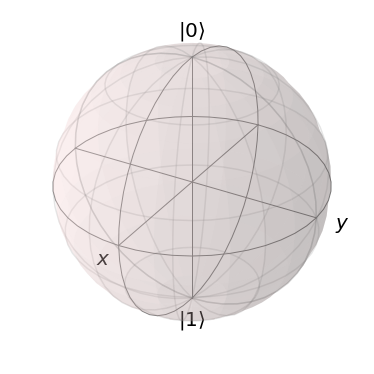

In [7]:
>>> B = qu.Bloch()
>>> #B.save()
>>> B.show()

In [8]:
B.add_states([qu.ket('0'),qu.ket('1')])

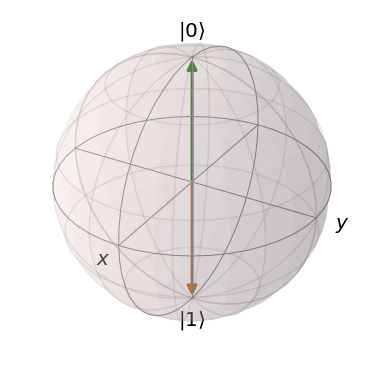

In [9]:
B.show()

In [10]:
#Define eigenvectors of Z,X,Y operators:
z_0 = qu.ket('0')
z_1 = qu.ket('1')
x_0 = (z_0 + z_1).unit()
x_1 = (z_0 - z_1).unit()
y_0 = (z_0 +(0+1j)*z_1).unit()
y_1 = (z_0 - (0-1j)*z_1).unit()

In [11]:
B.clear()

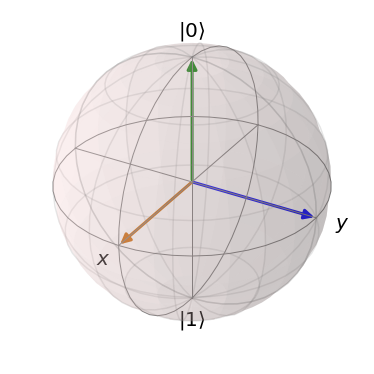

In [12]:
B.add_states([z_0,x_0,y_0])
B.show()

## 2. Measuring a general state <a id='2'></a>
[Index](#I)

the idea of a measurement on a qubit, is that, I try to "collapse" the state $|\varphi = a|0\rangle + b|1\rangle$ in , for e.g. the state $|0\rangle$, and that will happen with probability $|a|^2$

This is managed by applying to the state, the operator $P_0 = |0\rangle \langle 0|$ (called **projector** on state $|0\rangle$):


$$ P_0|\varphi\rangle = a|0\rangle$$

with probability:
$$\langle P_0 \rangle = \langle \varphi|P_0|\varphi \rangle = |a|^2$$
>NOTE: it would have been tha same if we have considered the projector on state $|1\rangle$

In [13]:
#Define a function which performs multiple quantum measurements on any qubit:
def measurement_qubit(N,qbit): #args: #measurements(int),qubit(Qobj(),container of outcomes(array/list)
    outcomes = ''
    a = qbit.full()[0][0]  # a
    b = qbit.full()[1][0]  # b
    for i in range(N):
        if np.random.random() <= np.abs(a) ** 2:
            outcomes += '0'
        else:
            outcomes += '1'
    return outcomes

In [32]:
#Define a function which performs multiple quantum measurements on any qubit:
def measurement_qubit2(N,qbit): #args: #measurements(int),qubit(Qobj(),container of outcomes(array/list)
    outcomes = ''
    p0 = qu.expect(qu.ket('0').proj(),qbit)
    p1 = qu.expect(qu.ket('1').proj(),qbit)
    for i in range(N):
        if np.random.random() <= p0:
            outcomes += '0'
        else:
            outcomes += '1'
    return outcomes

> to understand why $a$ and $b$ are defined in that way, check the raw code below:

we test our _measure_qbit(qbit)_ function, by applying it on $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ (equal superposition of the computational basis states $|0\rangle$ and $|1\rangle$)
<br> (we will expect, in N-measurements, $\sim$ half outcomes = ```0``` and the other half = ```1```):

<BarContainer object of 1 artists>

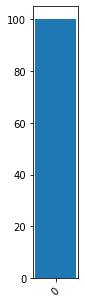

In [34]:
N=100
qubit = z_0
from collections import Counter
q_outcomes = Counter(measurement_qubit2(N,qubit))

# plot probabilities of each state of the graph corresponding to every possible configuration after a cut
plt.figure(figsize = (2**len(qubit.dims[0])/2.5,5))
plt.xticks(rotation=45)
plt.bar(q_outcomes.keys(),q_outcomes.values(),width = 0.5)

and on $|0\rangle$
<br> (we will expect, in N-measurements, all outcomes = ```0``` and no outcomes = ```1```):

> in the two raw codes above, we've checked that the _measure_qbit(qbit)_ function works as expected

## 3. Pure and mixed states <a id='3'></a>
[Index](#I)

Another way to express a quantum state is through it's **density matrix**, given the state $|\varphi \rangle$ the correspective density matrix is defined as: 
$$\rho = |\varphi \rangle \langle \varphi|$$

the idea behind the use of the d.m. cames from a classical propabilistic (statistical machanics) issue: in practice, while preparing the state $|\phi \rangle$ (or, in general, an ensemble), I have a probabilistic outcome:<br>
$|\phi\rangle \rightarrow |\phi_1 \rangle$ with probability $\lambda_1, |\phi_2 \rangle$ with probability $\lambda_2$, ...  
<br>
and I express that state through the d.m.: $\rho = \sum_{i}^{}\lambda_i|\phi_i\rangle \langle\phi_i|$


and here I we have a distinction:
* **pure state**: a state which may be expressed as (precise) vector state (e.g. $|\varphi\rangle = a|0\rangle + b|1\rangle$)
* **mixed state**: a state which has classical probabilities to be different vector states (and can be expressed only through a densisty matrix)

given an operator related to an observable (i.e. a measurable property of the state $|\phi\rangle$) $\hat{O}$, it's expectation value $\langle \hat{O} \rangle = \langle\phi|\hat{O}|\phi\rangle$ (i.e. it's _mean value_ on the state), in terms of d.m. is:


$$\langle\hat{O}\rangle = tr(\rho\hat{O})$$

so, 

> Here I've put the "intuitive" introduction to the idea and definitions, it must be expressed better and more complete

In [18]:
#Define a function which performs multiple quantum measurements on any qubit:
def measurement_dm(N,dm): #args: #measurements(int),qubit(Qobj(),container of outcomes(array/list)
    outcomes = ''
    p_0 = (dm * qu.ket('0').proj()).tr()  
    p_1 = (dm * qu.ket('1').proj()).tr()  
    for i in range(N):
        if np.random.random() <= p_0:
            outcomes += '0'
        else:
            outcomes += '1'
    return outcomes

<BarContainer object of 2 artists>

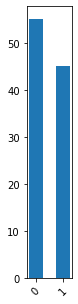

In [19]:
N=100
dm = y_0*y_0.dag()
from collections import Counter
dm_outcomes = Counter(measurement_dm(N,dm))

# plot probabilities of each state of the graph corresponding to every possible configuration after a cut
plt.figure(figsize = (2**len(dm.dims[0])/2.5,5))
plt.xticks(rotation=45)
plt.bar(dm_outcomes.keys(),dm_outcomes.values(),width = 0.5)

## 4. Measurement on composite systems <a id='4'></a>
[Index](#I)

### 4.1 Composite systems <a id='4.1'></a>

In general we may have systems composed of many qubits: composite systems
* the space state of a single qubit is a 2D complex vectorial space (Hilbert space $\mathscr{H}$)
* the space state of a system of n qubits is the outer product (tensorial product) of n 2D-Hilbert spaces ($\mathscr{H}^{\otimes n} = \mathscr{H} \otimes ... \otimes \mathscr{H}$), with dimension: $2^n$
> NOTE: here the qubit referes to a quantum object where we're interest in only one property of it (e.g. spin component along an axis of an electron) (the quantity is discretized in the sense that, a measure about it gives only two possible values and from that came the fact that the dimension of it's space is 2, with two base-vectors $|0\rangle$ and $|1\rangle$).
<br><br>In general, we may be interested in m-properties to define our quantum object: $|\phi(spin,... ,... , ...) \rangle$ and its space state is $\mathscr{H}^m$.
So, for n quantum objects, where we're interested in m properties, the space state is: $\mathscr{H}^{m,\otimes n} = \mathscr{H}^m \otimes ... \otimes \mathscr{H}^m$
>> NOTE: for spin, the space is 2D, for other quantities, it differs: 
>>* angular momentum ($\vec{L}$): dim = 2L + 1
>>* energy: infinite
>>* posisiton: infinite
>>* momentum: infinite 
>>> CHECK THIS!!!!!

>!!!!: insert exapmles, explain more

### 4.2 Measurment of composite systems <a id='4.2'></a>

given $n$ qubits, in their states $|\varphi_i\rangle \in \mathscr{H}$, the composite system of these states is:


$$|\varphi\rangle = |\varphi_1\rangle \otimes |\varphi_2\rangle \otimes ... \otimes |\varphi_n\rangle  \in \mathscr{H}^{\otimes n}$$

it's computational basis is $ \{z : z \in \{0,1\}^n\} = \{|0...0\rangle,|0...01\rangle,...,|101...11\rangle,|1...1\rangle\}$ (dim($\mathscr{H}^{\otimes n}$)=$2^n$)
> NOTE: each element of $\mathscr{H}^{\otimes n}$, for e.g. $|0...0\rangle$ is equal to: $|0\rangle_1 \otimes |0\rangle_2 \otimes ... \otimes |0\rangle_n$ 

in general, it's not assured that we may work with pure states, so we will consider density matricies:

>(for a pure state $|\varphi\rangle \rightarrow \rho = |\varphi_1\rangle \langle \varphi_1| \otimes ... \otimes ... |\varphi_n\rangle \langle \varphi_n|$)

* one approach may be to consider projectors on the computational basis elements, but that would require #processes that goes as $2^n$
<br>
* another approach may be to do single qubit measurements on each qubit (so that will require #precesses that goes as $n$)
> NOTE: we have to be aware, that after the measurement on qubit $i$, we have to take into account that the state has been modified by the measurement:
$$\rho \rightarrow \rho_i = \frac{\hat{O}_i \rho \hat{O}_i^\dagger}{tr(\hat{O}_i^\dagger\hat{O}_i \rho)}$$

in particular, for a projector of qubit $i$ on, for e.g. $|0\rangle$: 

$$\rho \rightarrow \rho_i = \frac{P_{i,0} \rho P_{i,0}^\dagger}{p_i}$$




In [40]:
# initial state |s>:
L = 3
listS = []
list0 = []
for i in range(L):
    listS.append(x_0)
    list0.append(z_0+x_0+y_0)
s = qu.tensor(listS)
t = qu.tensor(list0)

In [41]:
t_dm = t * t.dag()

In [22]:
s_dm = s*s.dag()

In [44]:
s*s.dag() == s.proj()

True

In [24]:
#Define list of projecotrs on single qubits:
P0 = []
for i in range(L):
    P0.append(qu.tensor([qu.qeye(2)]*i + [qu.ket('0').proj()] + [qu.qeye(2)]*(L-i-1)))
P1 = []
for i in range(L):
    P1.append(qu.tensor([qu.qeye(2)]*i + [qu.ket('1').proj()] + [qu.qeye(2)]*(L-i-1)))

In [25]:
#Define a function which performs a quantum measurement on any density matrix (it works even for a mixed state)
def measure_c_dm(N,dm):
    L = len(dm.dims[0])
    outcomes = []
    for j in range(N):
        outcome = ''
        dm_dummy = dm.copy()
        for i in range(L):   
            p0_i = (P0[i] * dm_dummy).tr()
            p1_i = (P1[i] * dm_dummy).tr()
            if np.random.random() <= p0_i:
                outcome += '0'
                dm_dummy = (P0[i]*dm_dummy)/p0_i
            else:
                outcome += '1'
                dm_dummy = (P1[i]*dm_dummy)/p1_i
        outcomes.append(outcome)
    return outcomes

<BarContainer object of 8 artists>

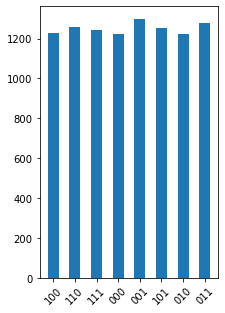

In [43]:
N=10000
dm = s_dm
from collections import Counter
c_outcomes = Counter(measure_c_dm(N,dm))

# plot probabilities of each state of the graph corresponding to every possible configuration after a cut
plt.figure(figsize = (2**L/2.5,5))
plt.xticks(rotation=45)
plt.bar(c_outcomes.keys(),c_outcomes.values(),width = 0.5)